In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df_cell = pd.read_csv(r"E:\DNA_analysis\Postanalysis_MeCP2\selected_all_cells.csv")
df_cell.head()

,rna_experiment,uid,fov_id,cell_id,subclass,chr,hyb,fiberidx,numfiber,MeCP2_genotype,z_um,x_um,y_um
0,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,1,1,1,WT,7.636160,-822.088090,-913.946669
1,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,5,1,1,WT,7.497020,-821.997755,-913.834680
2,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,6,1,1,WT,7.907996,-822.085151,-913.055899
3,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,7,1,1,WT,7.510613,-821.604052,-913.951513
4,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,9,1,1,WT,7.950076,-822.104476,-913.759850


In [3]:
sel_subclass = ['L2/3 IT', 'L4/5 IT', 'L5 IT', 'L6 IT', 'L5 ET', 'L5/6 NP', 'L6 CT', 'Pvalb', 'Sst', 'Astro', 'Oligo', 'Endo-PVM',
               'Peri', 'L6b']
df_cell = df_cell[df_cell['subclass'].isin(sel_subclass)].copy()
df_cell.head()

,rna_experiment,uid,fov_id,cell_id,subclass,chr,hyb,fiberidx,numfiber,MeCP2_genotype,z_um,x_um,y_um
0,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,1,1,1,WT,7.636160,-822.088090,-913.946669
1,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,5,1,1,WT,7.497020,-821.997755,-913.834680
2,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,6,1,1,WT,7.907996,-822.085151,-913.055899
3,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,7,1,1,WT,7.510613,-821.604052,-913.951513
4,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,9,1,1,WT,7.950076,-822.104476,-913.759850


In [4]:
# filter out cells with smaller numbers
kept_uids = []
for uid, df_uid in df_cell.groupby('uid'):
    if len(df_uid)>=600:
        kept_uids.append(uid)
df_cell = df_cell[df_cell['uid'].isin(kept_uids)].copy()
print('Final length of dataframe: ', end=str(len(df_cell))+'\n')

Final length of dataframe: 30105095


In [5]:
df_cell.reset_index(inplace=True, drop=True)
df_cell

,rna_experiment,uid,fov_id,cell_id,subclass,chr,hyb,fiberidx,numfiber,MeCP2_genotype,z_um,x_um,y_um
0,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,1,1,1,WT,7.636160,-822.088090,-913.946669
1,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,5,1,1,WT,7.497020,-821.997755,-913.834680
2,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,6,1,1,WT,7.907996,-822.085151,-913.055899
3,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,7,1,1,WT,7.510613,-821.604052,-913.951513
4,20220724,315504059834584005882116425750755973090,3,100,Oligo,chr1,9,1,1,WT,7.950076,-822.104476,-913.759850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105090,20221103,89122740682026432485889472968309145659,223,9,Oligo,chrX,52,1,1,WT,5.013337,-881.750424,3237.777798
30105091,20221103,89122740682026432485889472968309145659,223,9,Oligo,chrX,53,1,1,WT,5.186722,-881.871182,3237.749839
30105092,20221103,89122740682026432485889472968309145659,223,9,Oligo,chrX,57,1,1,WT,4.807636,-882.320117,3237.671028
30105093,20221103,89122740682026432485889472968309145659,223,9,Oligo,chrX,59,1,1,WT,4.135855,-882.582737,3238.018093


In [6]:
import sys
sys.path.append(r'C:\Users\cosmosyw\Documents\Softwares')
import DNA_MERFISH_analysis
from DNA_MERFISH_analysis.postanalysis import density, radial
import multiprocessing as mp

In [7]:
# get radial position
from tqdm import tqdm

arg_list = []
for uid, df_uid in tqdm(df_cell.groupby('uid')):
    arg_list.append(df_uid.copy())

with mp.Pool(30) as pool:
    result = pool.starmap(radial.Radial_positioning_from_center_for_loci, zip(arg_list), chunksize=1)

df_cell_RP = pd.concat(result, ignore_index=True)
df_cell_RP

100%|█████████████████████████████████████████████████████████████████████████████████| 24950/24950 [00:04<00:00, 5733.78it/s]


,rna_experiment,uid,fov_id,cell_id,subclass,chr,hyb,fiberidx,numfiber,MeCP2_genotype,z_um,x_um,y_um,distance_to_center,Norm_RP
0,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,0,1,1,KO,4.986920,1055.791515,3081.345493,2.890545,0.912064
1,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,4,1,1,KO,5.413493,1055.079060,3082.126948,3.268251,1.000000
2,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,7,1,1,KO,5.074405,1055.775459,3081.286017,2.909113,0.918098
3,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,12,1,1,KO,5.554967,1056.381962,3080.336884,2.950823,0.846580
4,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,14,1,1,KO,5.366794,1055.876704,3080.989424,2.917820,0.912181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105090,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chrX,56,1,1,KO,4.360475,1335.773312,-4.855872,3.321581,0.681318
30105091,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chrX,57,1,1,KO,5.261996,1336.466122,-5.476293,3.948670,0.845148
30105092,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chrX,60,1,1,KO,5.179535,1337.131805,-6.162622,4.671649,1.000000
30105093,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chrX,62,1,1,KO,5.313335,1336.464419,-4.948058,3.442214,0.737446


In [8]:
# release memory
del result
del arg_list

In [10]:
# add AB to the dataframe
df_ab = pd.read_csv(r"C:\Users\cosmosyw\Documents\Research\Mecp2_revision\AB_from_median\result\Mecp2_subclass_PC_values_call_Separate.csv", index_col=0)
df_ab.set_index('loci_name', inplace=True)

# drop KO columns
kept_columns = [col for col in df_ab.columns if '_WT' in col]
df_ab = df_ab[kept_columns].copy()
column_rename = {col:col.split('_WT')[0] for col in df_ab.columns}
df_ab.rename(columns=column_rename, inplace=True)

# get AB identities
for col in df_ab.columns:
    df_ab[col] = df_ab[col].apply(lambda x: 'A' if x>0 else 'B')
df_ab.reset_index(inplace=True)

df_refgen = pd.read_csv(r"E:\DNA_analysis\refgen_with_loci_index_CG_Density.csv", index_col=0)
df_ab = df_ab.merge(df_refgen.loc[:,['loci_name', 'chr', 'hyb']], left_on='loci_name', right_on=['loci_name'])
df_ab.head()

,loci_name,Oligo,L5 IT,Micro,Peri,Endo-PVM,Astro,OPC,L6 CT,L5 ET,...,Pvalb,L6 IT,Lamp5,L6b,Sst,L4/5 IT,L2/3 IT,Vip,chr,hyb
0,chr1_3742742_3759944,B,B,B,B,B,B,B,B,A,...,A,B,B,B,A,B,B,B,chr1,0
1,chr1_6245958_6258969,B,B,B,B,B,B,B,B,B,...,B,B,B,B,B,B,B,B,chr1,1
2,chr1_8740008_8759916,B,B,B,B,B,B,B,B,B,...,B,B,B,B,B,B,B,B,chr1,2
3,chr1_9627926_9637875,B,B,B,B,B,B,B,B,B,...,B,B,B,B,B,B,B,B,chr1,3
4,chr1_9799472_9811359,B,B,B,B,B,B,B,B,B,...,B,B,B,B,B,B,B,B,chr1,4


In [11]:
arg_list = []
for uid, df_uid in tqdm(df_cell_RP.groupby('uid')):
    _df = df_uid.copy()
    _df = _df[_df['chr']!='chrX'].copy()
    arg_list.append(_df)
arg_sigma = [0.5,]*len(arg_list)
arg_ab_list = [df_ab,]*len(arg_list)
    
with mp.Pool(15) as pool:
    result = pool.starmap(density.calculate_AB_score_original_Trans, 
                          zip(arg_list, arg_sigma, arg_ab_list), 
                          chunksize=1)
    
df_cell_RP_ABscore = pd.concat(result, ignore_index=True)
df_cell_RP_ABscore

100%|█████████████████████████████████████████████████████████████████████████████████| 24950/24950 [00:14<00:00, 1663.97it/s]


,rna_experiment,uid,fov_id,cell_id,subclass,chr,hyb,fiberidx,numfiber,MeCP2_genotype,z_um,x_um,y_um,distance_to_center,Norm_RP,AB,AB_density
0,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,0,1,1,KO,4.986920,1055.791515,3081.345493,2.890545,0.912064,B,1.191231
1,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,4,1,1,KO,5.413493,1055.079060,3082.126948,3.268251,1.000000,B,0.599937
2,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,7,1,1,KO,5.074405,1055.775459,3081.286017,2.909113,0.918098,B,1.310849
3,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,12,1,1,KO,5.554967,1056.381962,3080.336884,2.950823,0.846580,B,4.514975
4,20220809,100001802425095388929830403384542697355,118,51,Endo-PVM,chr1,14,1,1,KO,5.366794,1055.876704,3080.989424,2.917820,0.912181,B,2.404485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29181834,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chr9,94,1,1,KO,2.254729,1337.214497,-0.122268,2.837618,0.701361,A,-0.313612
29181835,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chr9,96,1,1,KO,2.274779,1336.764475,-0.260476,2.651528,0.659153,B,0.153372
29181836,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chr9,98,1,1,KO,2.068669,1337.358644,-0.174249,3.007269,0.753274,A,-0.618081
29181837,20220809,99985301386051603919919265565120637731,85,55,L5/6 NP,chr9,100,1,1,KO,1.620433,1338.003907,0.901294,4.164161,1.000000,A,-2.560376


In [12]:
df_cell_RP_ABscore.to_csv(r'E:\DNA_analysis\Postanalysis_MeCP2\all_cells_TransABDensity_ABfromWT.csv')

In [13]:
chroms = []
hybs = []
wt_ABs = []
ko_ABs = []
wt_rps = []
ko_rps = []
wt_ABdensity = []
ko_ABdensity = []
subclasses = []
for (chrom, hyb, subcls), _df in df_cell_RP_ABscore.groupby(['chr', 'hyb', 'subclass']):
    chroms.append(chrom)
    hybs.append(hyb)
    wt_ABs.append(_df[_df['MeCP2_genotype']=='WT']['AB'].values[0])
    ko_ABs.append(_df[_df['MeCP2_genotype']=='KO']['AB'].values[0])
    subclasses.append(subcls)
    wt_rps.append(np.nanmedian(_df[_df['MeCP2_genotype']=='WT']['Norm_RP']))
    ko_rps.append(np.nanmedian(_df[_df['MeCP2_genotype']=='KO']['Norm_RP']))
    wt_ABdensity.append(np.nanmean(_df[_df['MeCP2_genotype']=='WT']['AB_density']))
    ko_ABdensity.append(np.nanmean(_df[_df['MeCP2_genotype']=='KO']['AB_density']))

In [14]:
df_analysis = pd.DataFrame({'chr':chroms, 'hyb':hybs, 'WT_AB':wt_ABs, 'KO_AB':ko_ABs, 'WT_RP':wt_rps, 'KO_RP':ko_rps,
                           'WT_AB_density':wt_ABdensity, 'KO_AB_density':ko_ABdensity, 'subclass':subclasses})
df_analysis

,chr,hyb,WT_AB,KO_AB,WT_RP,KO_RP,WT_AB_density,KO_AB_density,subclass
0,chr1,0,B,B,0.824292,0.817413,-0.472591,-0.535099,Astro
1,chr1,0,B,B,0.804049,0.826209,-0.191865,-0.088599,Endo-PVM
2,chr1,0,B,B,0.837700,0.810326,-0.431916,-0.364987,L2/3 IT
3,chr1,0,B,B,0.839523,0.812023,-0.382161,-0.316951,L4/5 IT
4,chr1,0,A,A,0.837054,0.817692,-0.835776,-0.678612,L5 ET
...,...,...,...,...,...,...,...,...,...
26833,chr9,101,A,A,0.728673,0.725666,-0.342138,-0.290632,L6b
26834,chr9,101,B,B,0.638544,0.632211,0.007682,0.005984,Oligo
26835,chr9,101,A,A,0.551188,0.582079,1.105623,1.026987,Peri
26836,chr9,101,A,A,0.719501,0.691119,-0.540227,-0.515849,Pvalb


In [15]:
df_analysis['diff_ABdensity'] = df_analysis['KO_AB_density'] - df_analysis['WT_AB_density']

def get_upper_bound(all_values, bin_size=10):
    percentiles = np.arange(0,100, bin_size)
    percentiles = percentiles + bin_size
    upper_bound = []
    for p in percentiles:
        upper_bound.append(np.percentile(all_values, p))
    upper_bound = np.array(upper_bound)
    return upper_bound

df_list = []
for subcls, df_subcls in df_analysis.groupby('subclass'):
    df = df_subcls.copy()
    upper_bound = get_upper_bound(df['WT_RP'].values)
    df['rp_interval'] = df['WT_RP'].apply(lambda x: np.argmax(upper_bound>=x))
    df_list.append(df)

df_analysis = pd.concat(df_list, ignore_index=True)
df_analysis

,chr,hyb,WT_AB,KO_AB,WT_RP,KO_RP,WT_AB_density,KO_AB_density,subclass,diff_ABdensity,rp_interval
0,chr1,0,B,B,0.824292,0.817413,-0.472591,-0.535099,Astro,-0.062508,9
1,chr1,1,B,B,0.782791,0.797008,-0.433372,-0.325102,Astro,0.108270,8
2,chr1,2,B,B,0.803916,0.799593,-0.563465,-0.391268,Astro,0.172197,9
3,chr1,3,B,B,0.741137,0.755961,-0.256475,-0.160182,Astro,0.096294,6
4,chr1,4,B,B,0.746740,0.735475,-0.275178,-0.021202,Astro,0.253977,6
...,...,...,...,...,...,...,...,...,...,...,...
26833,chr9,97,A,A,0.703303,0.727468,-1.036026,-1.131136,Sst,-0.095110,1
26834,chr9,98,B,B,0.707824,0.716016,-1.250219,-1.237621,Sst,0.012598,2
26835,chr9,99,B,B,0.721977,0.690193,-1.069510,-0.970801,Sst,0.098708,2
26836,chr9,100,B,B,0.697447,0.686116,-1.251657,-1.142627,Sst,0.109030,1


In [16]:
sel_subclasses = ['L2/3 IT', 'L4/5 IT', 'L5 IT', 'L6 IT', 'L5 ET', 'L5/6 NP', 'L6 CT', 'L6b',
                   'Pvalb', 'Sst', 
                  'Astro', 'Endo-PVM', 'Peri', 'Oligo']

In [17]:
import matplotlib as mpl
mpl.rc('figure', dpi=300)
mpl.rc('figure', titlesize=10.) 
mpl.rc('figure.constrained_layout', use=True)

mpl.rc('axes', labelsize=8.)
mpl.rc('axes', titlesize=9.)
mpl.rc('axes', linewidth=0.5)

mpl.rc('font', family='Arial')

mpl.rc('savefig', dpi=300)
mpl.rc('savefig', format='pdf')

mpl.rc('xtick', labelsize=7.)
mpl.rc('xtick.major', size=3)
mpl.rc('xtick.major', width=0.5)

mpl.rc('ytick', labelsize=7.)
mpl.rc('ytick.major', size=3)
mpl.rc('ytick.major', width=0.5)

mpl.rcParams['pdf.fonttype'] = 42

C:\Users\cosmosyw\anaconda3\envs\merlin_postanalysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


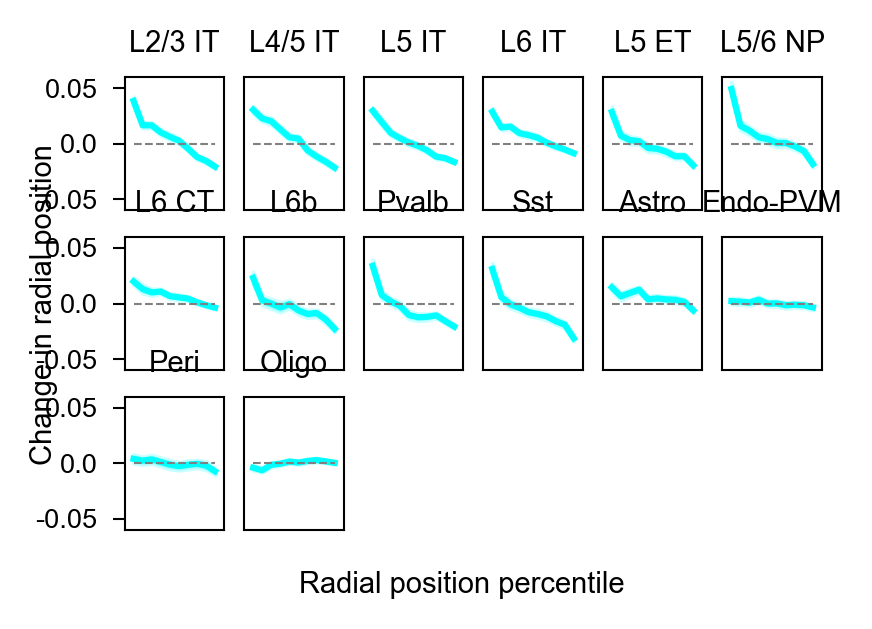

In [18]:
df_analysis['change_RP'] = df_analysis['KO_RP'] - df_analysis['WT_RP']
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
spec = GridSpec(nrows=3, ncols=6)

fig = plt.figure(figsize=(3,2), dpi=300)

for i, subcls in enumerate(sel_subclasses):
    ax = fig.add_subplot(spec[i//6,i%6])
    
    df_plot = df_analysis[df_analysis['subclass']==subcls].copy()
   
    sns.lineplot(data=df_plot, x='rp_interval', y='change_RP', ax=ax, color='cyan')
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xlim(-1, 10)
    ax.set_ylim(-0.06, 0.06)
    ax.plot([0,9],[0,0], color='gray', linewidth=0.5, linestyle='--')
    ax.set_title(subcls, fontsize=7)
    
    if (i%6)==0:
        ax.set_yticks([-0.05,0.0,0.05],[-0.05,0.0,0.05], fontsize=6.5)
    else:
        ax.set_yticks([])
    
    ax.set_xticks([])
 
    
fig.supxlabel('Radial position percentile', fontsize=7)
fig.supylabel('Change in radial position', fontsize=7)

plt.show()

C:\Users\cosmosyw\anaconda3\envs\merlin_postanalysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


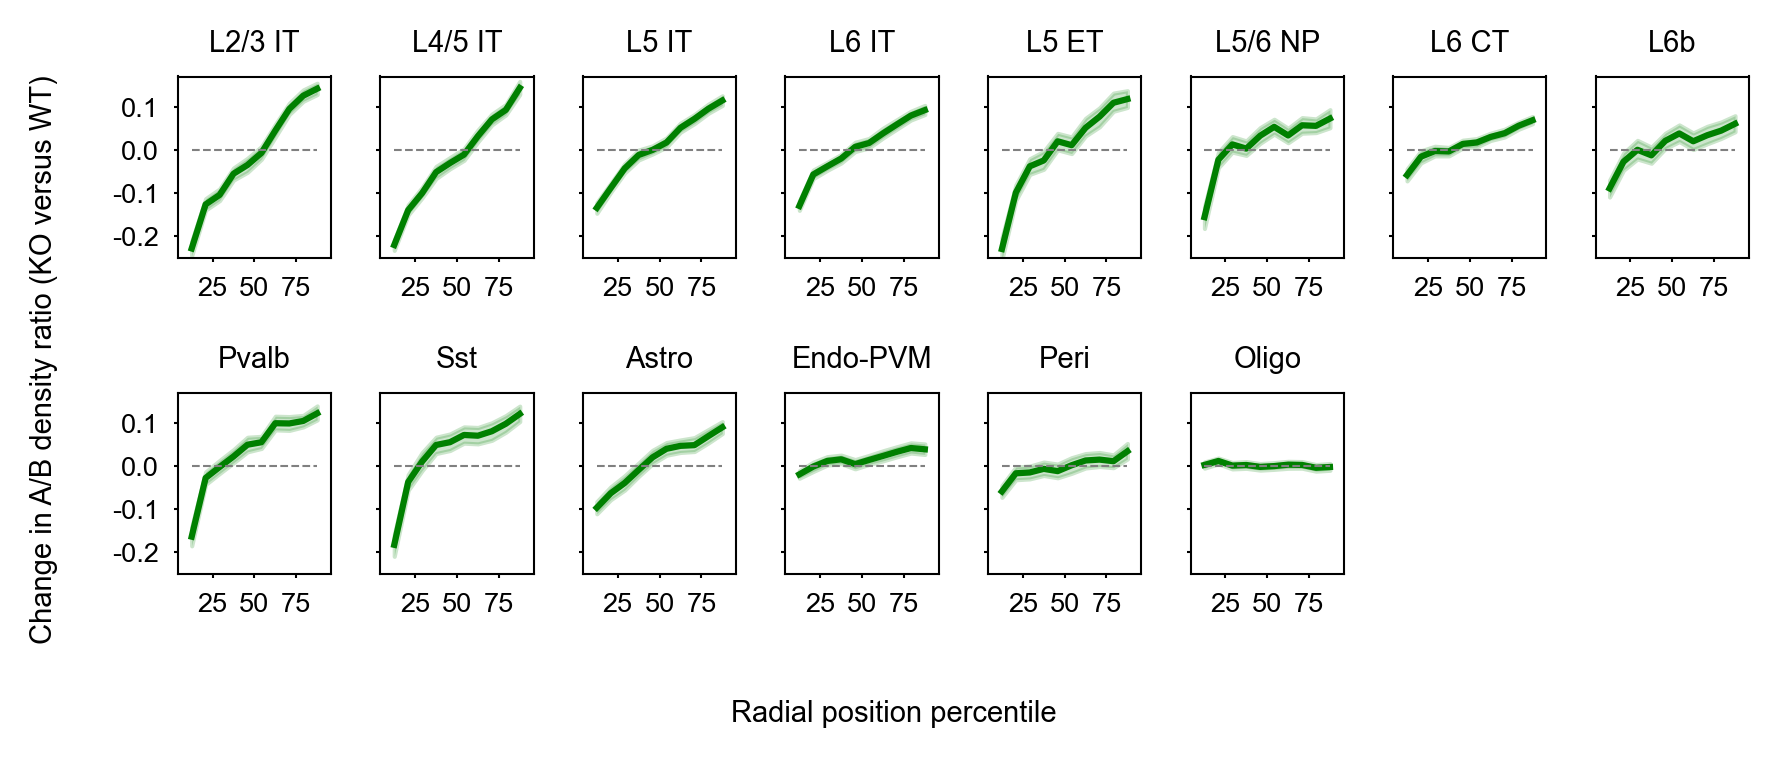

In [19]:
figure_folder = r'Trans_subclass_from_WT_cells_PCAseparate'
if not os.path.exists(figure_folder):
    os.mkdir(figure_folder)
    
spec = GridSpec(nrows=2, ncols=8)

fig = plt.figure(figsize=(6,2.5), dpi=300)

for i, subcls in enumerate(sel_subclasses):
    ax = fig.add_subplot(spec[i//8,i%8])
    
    df_plot = df_analysis[df_analysis['subclass']==subcls].copy()
   
    sns.lineplot(data=df_plot, x='rp_interval', y='diff_ABdensity', ax=ax, color='green')
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xlim(-1, 10)
    ax.set_ylim(-0.25, 0.17)
    ax.plot([0,9],[0,0], color='gray', linewidth=0.5, linestyle='--')
    ax.set_title(subcls, fontsize=7)
    
    if (i%8)==0:
        ax.set_yticks([-0.2,-0.1,0.0,0.1],[-0.2,-0.1,0.0,0.1], fontsize=6.5)
    else:
        ax.set_yticks([-0.2,-0.1,0.0,0.1],['','','',''])
    
    ax.set_xticks([1.5,4.5,7.5],[25,50,75], fontsize=6.5)
    
    ax.tick_params(axis='both', length=1)
        
fig.supxlabel('Radial position percentile', fontsize=7)
fig.supylabel('Change in A/B density ratio (KO versus WT)', fontsize=7)
plt.tight_layout()

#fig.savefig(os.path.join(figure_folder, 'Change_AB_density_by_RP.pdf'))

plt.show()

C:\Users\cosmosyw\anaconda3\envs\merlin_postanalysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


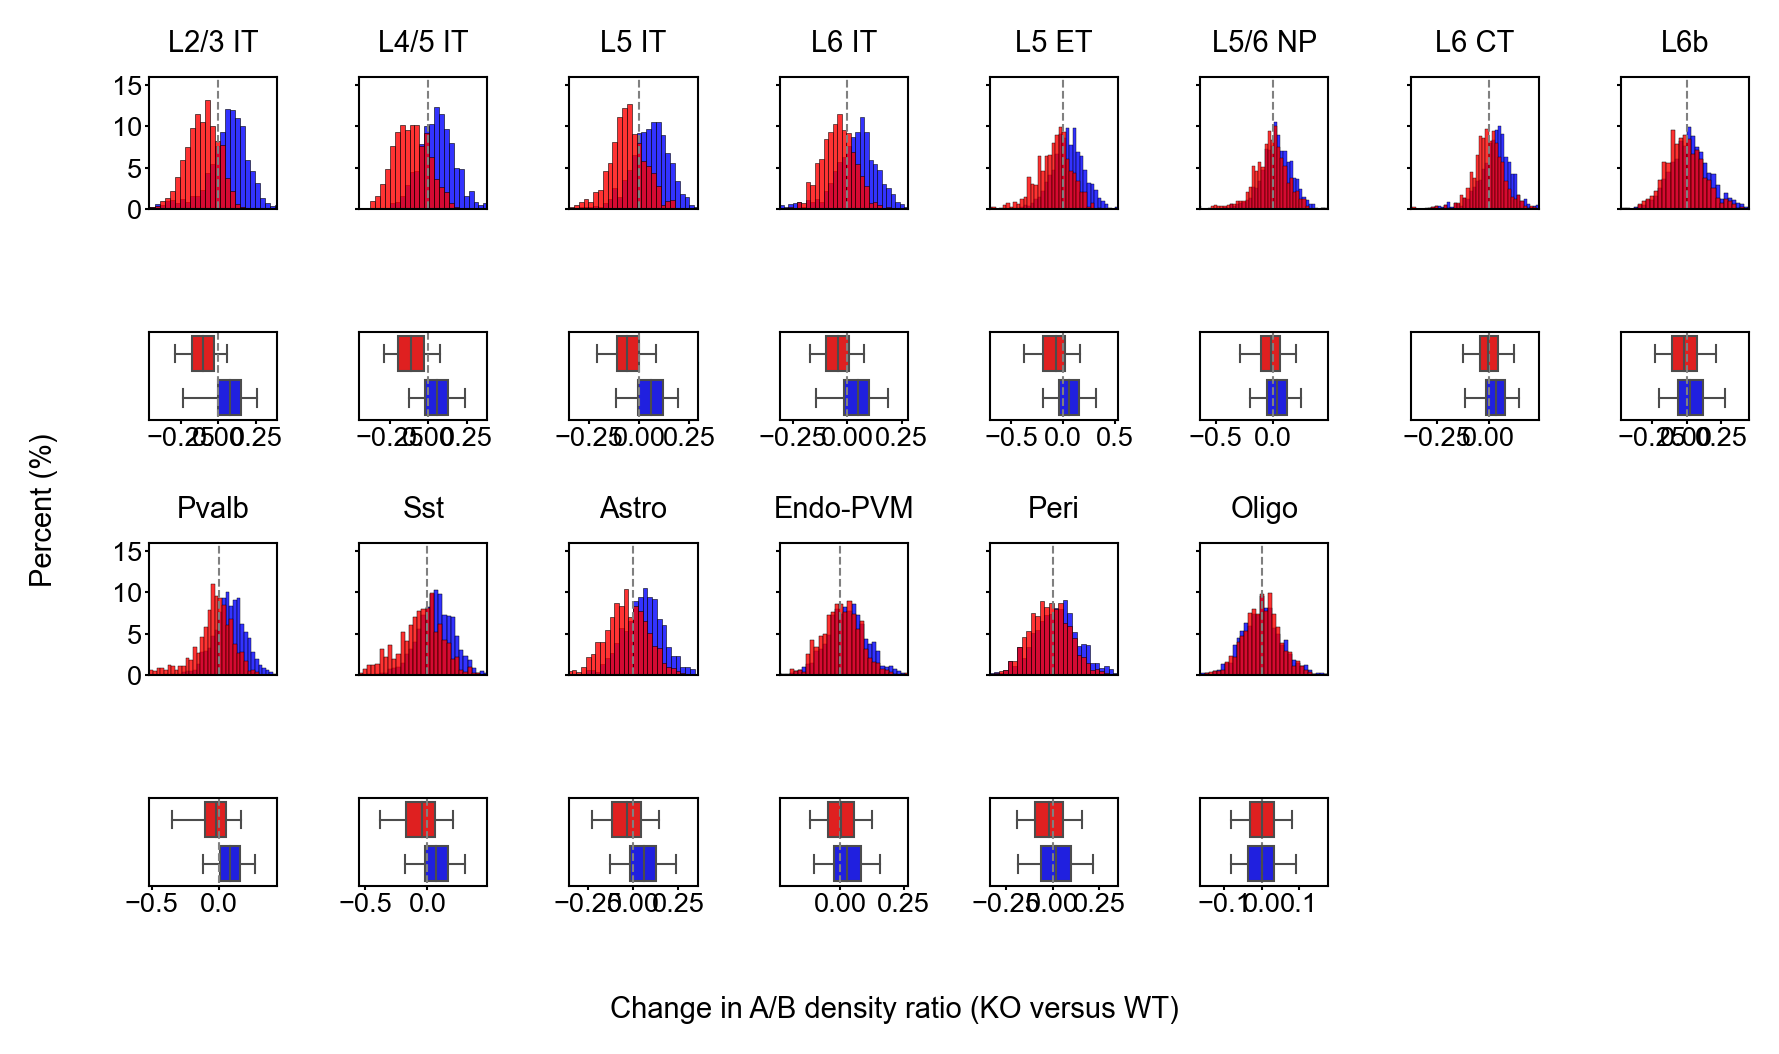

In [20]:
spec = GridSpec(nrows=4, ncols=8, height_ratios=[6,4,6,4])

fig = plt.figure(figsize=(6,3.5), dpi=300)

for i, subcls in enumerate(sel_subclasses):
    
    if (i//8)==0:
        row = 0
    elif (i//8)==1:
        row = 2

    ax = fig.add_subplot(spec[row,i%8])
    
    df_plot = df_analysis[df_analysis['subclass']==subcls].copy()
    df_plot = df_plot[df_plot['WT_AB']!='unassigned'].copy()
    
    
    ax.set_ylim(0,16)
    x_min = np.percentile(df_plot['diff_ABdensity'].values, 0.1)
    x_max = np.percentile(df_plot['diff_ABdensity'].values, 99.9)
    ax.set_xlim(x_min, x_max)
    ax.set_title(subcls, fontsize=7)
    
    sns.histplot(data=df_plot, x='diff_ABdensity', hue='WT_AB', ax=ax, stat='percent', common_norm=False,
                 palette={'A':'red', 'B':'blue'}, legend=False, alpha=0.8, hue_order=['A','B'])
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    
    if (i%8)==0:
        ax.set_yticks([0,5,10,15],[0,5,10,15],fontsize=6.5)
    else:
        ax.set_yticks([0,5,10,15],['','','',''])
    
    ax.set_xticks([])
    ax.tick_params(axis='y', length=1, pad=0.6)
    ax.plot([0,0], [0,16], color='gray', linewidth=0.5, linestyle='--')
    
    ax2 = fig.add_subplot(spec[row+1,i%8])
    sns.boxplot(data=df_plot, x='diff_ABdensity', y='WT_AB', ax=ax2, fliersize=0, linewidth=0.5, order = ['A','B'],
                 palette={'A':'red', 'B':'blue'}, whis=[5, 95])
    
    ax2.set_yticks([])
    ax2.set_ylabel(None)
    ax2.set_xlabel(None)
    x_min = np.percentile(df_plot['diff_ABdensity'].values, 0.1)
    x_max = np.percentile(df_plot['diff_ABdensity'].values, 99.9)
    ax2.set_xlim(x_min, x_max)
    ax2.tick_params(axis='x', labelsize=6.5, length=1, pad=0.6)
    ax2.plot([0,0],[-0.5,1.5], linewidth=0.5, color='gray', linestyle='--')

fig.supxlabel('Change in A/B density ratio (KO versus WT)', fontsize=7)
fig.supylabel('Percent (%)', fontsize=7)

plt.tight_layout()

#fig.savefig(os.path.join(figure_folder, 'Change_AB_density_by_A_and_B.pdf'))

plt.show()